<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/assignment/ass5/bdm/KicapSambal/H20_Feature_Engineering_Flight_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Automated Feature Engineering Tools Assignment Using H2O**

**TEAM MEMBERS:**

ZUHAYR ARIF BIN ZAKARIA (MCS231002)

MOHD NOR BIN MOHIDIN (MCS231008)

NABILA HUSNA BINTI ROSLI (MCS231009)

NUR AZIMAH BINTI MOHD SALLEH (MCS231011)


## **Flight Price Prediction**

In this assignment, we will explore the automated feature engineering tools in data science which can save time and improve the quality of features used for machine learning models.



## **Dataset Selection**

The Dataset is about flight booking options from the website 'Easemytrip' for flight travel between India's top 6 metro cities. 'Easemytrip' is an internet platform for booking flight tickets, and hence a platform that potential passengers use to buy tickets.

The various features of the cleaned dataset are explained below:

1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.

2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.

3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.

4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.

5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.

6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.

7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.

8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.

9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.

10) Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.

11) Price: Target variable stores information of the ticket price.

## **Loading the Dataset**

### Import the required libraries

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
import datetime
import calendar

import warnings
warnings.filterwarnings("ignore")


### Import the dataset

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
flight_data = pd.read_csv('/content/drive/MyDrive/Dataset_FlightPrice.csv')

In [47]:
# View sample data
flight_data

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


## **Exploratory Data Analysis (EDA)**

In [48]:
# Summary of the DataFrame
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [49]:
# A statistical summary of the numerical columns.
flight_data.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [50]:
# Check if the dataset have null values.
flight_data.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [51]:
# Check if the dataset have duplicates.
flight_data.duplicated().sum()

0

In [52]:
# Check the columns name
flight_data.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [53]:
# Drop unnecessary column.
flight_data.drop("Unnamed: 0", axis=1, inplace=True)

In [17]:
#To make encoding which means to convert from categorical value to numerical
flight_data = flight_data.replace(to_replace="zero", value=0).replace(to_replace="one", value=1).replace(to_replace = "two_or_more", value = 2)


In [54]:
# Rearranging index
flight_data.index = np.arange(1, len(flight_data) + 1)

In [55]:
flight_data.shape

(300153, 11)

In [56]:
flight_data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
1,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
2,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
3,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
4,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
5,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


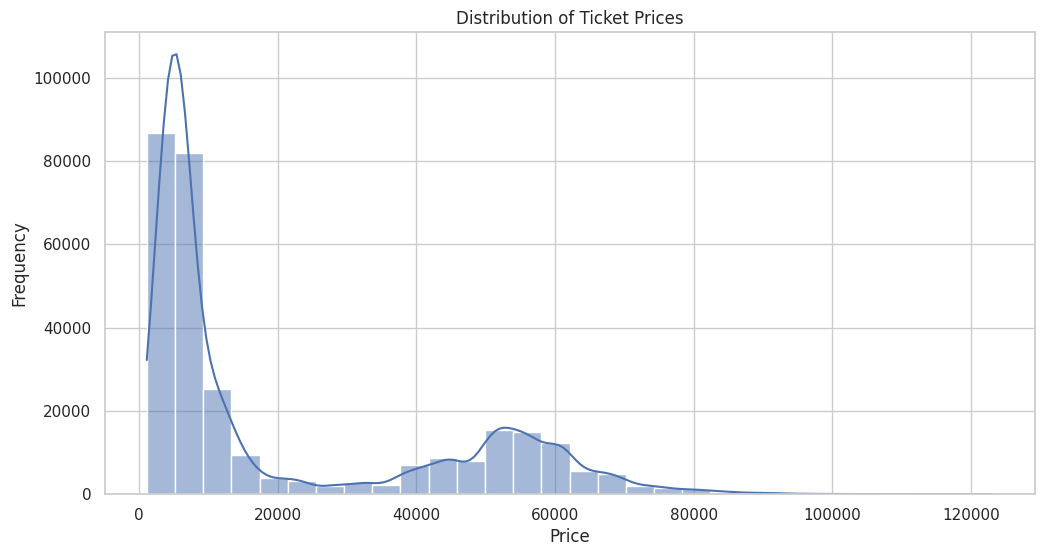

In [57]:
# Visualize the distribution of the target variable (Price)
plt.figure(figsize=(12, 6))
sns.histplot(flight_data['price'], bins=30, kde=True)
plt.title('Distribution of Ticket Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

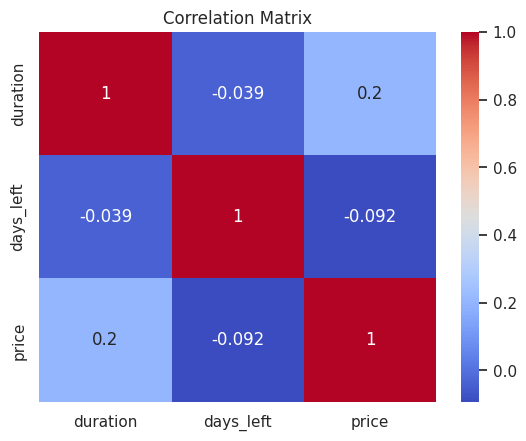

In [58]:
# Correlation matrix
correlation_matrix = flight_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


##**Feature Engineering with Automated Tools**

###Installation of H2o

In [59]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  default-jre-headless fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libxkbfile1 libxtst6 libxxf86dga1 openjdk-11-jre x11-utils
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  default-jre default-jre-headless fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libxkbfile1 libxtst6 libxxf86dga1 openjdk-11-jre x11-utils
0 upgraded, 12 newly installed, 0 to remove and 10 not upgraded.
Need to get 3,720 kB of archives.
After this operation, 12.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 default-jre-headless amd64 2:1.11-72build2 [3,042 B]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxtst6 amd64 2:1.2.3-1build4 [13.4 kB]
Get:3 http://archive.ubuntu.com

In [60]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.3/265.3 MB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.2-py2.py3-none-any.whl size=265363806 sha256=62cc7a614a2162f9f8021b16aefdf4c55fbf7b9940f3d41af3cb3578e84e5ae3
  Stored in directory: /root/.cache/pip/wheels/e9/ea/ab/889709967692e30c57c46137edd2cae6b2768bb65ec7cb8aa5
Successfully built h2o


In [61]:
# install and import H2o ! pip install h2o
import h2o
# We will be using default parameter Here with H2O init method
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20.1" 2023-08-24; OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp0la4ia1s
  JVM stdout: /tmp/tmp0la4ia1s/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp0la4ia1s/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,09 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.2
H2O_cluster_version_age:,17 days
H2O_cluster_name:,H2O_from_python_unknownUser_pqp5cg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


###Split the Dataframe into training and testing sets

In [64]:
# Convert categorical features to numerical using one-hot encoding
flight_data_encoded = pd.get_dummies(flight_data)

In [65]:
# Shuffle the DataFrame
flight_data = flight_data.sample(frac=1, random_state=42)

# Define the proportion of data to be used for training (e.g., 80% train, 20% test)
train_fraction = 0.8

# Calculate the number of samples for training and testing
train_size = int(len(flight_data) * train_fraction)

# Split the DataFrame into training and testing sets
train_flight_data = flight_data[:train_size].reset_index(drop=True)
test_flight_data = flight_data[train_size:].reset_index(drop=True)

###Convert the train data frame into the H2O Dataframe.

In [66]:
# convert pandas DataFrame into H2O Frame
train = h2o.H2OFrame(train_flight_data)
# Describe the train h20Frame
train.describe()


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Rows:240122
Cols:11

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
type,enum,enum,enum,enum,enum,enum,enum,enum,real,int,int
mins,,,,,,,,,0.83,1.0,1105.0
mean,,,,,,,,,12.223503718942922,26.01017399488597,20895.030909287787
maxs,,,,,,,,,49.83,49.0,123071.0
sigma,,,,,,,,,7.193131565975055,13.562093399322684,22706.770535302472
zeros,,,,,,,,,0,0,0
missing,0,0,0,0,0,0,0,0,0,0,0
0,Air_India,AI-506,Delhi,Morning,one,Early_Morning,Kolkata,Economy,19.75,40.0,7366.0
1,Vistara,UK-706,Kolkata,Morning,one,Night,Mumbai,Business,9.83,42.0,64831.0
2,Vistara,UK-772,Kolkata,Morning,one,Night,Bangalore,Economy,10.5,41.0,6195.0


###Convert the test dataset into the H2O Dataframe.

In [67]:
# convert the test dataset into the H2O Dataframe.
test = h2o.H2OFrame(test_flight_data)
# selecting feature and label columns

x = test.columns
y = 'price'
# remove label classvariable from feature variable
x.remove(y)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


### Run AutoML and start training.

In [68]:
# import autoML from H2O
from h2o.automl import H2OAutoML
# callh20automl function
aml = H2OAutoML(max_runtime_secs = 600,
				# exclude_algos =['DeepLearning'],
				seed = 1,
				# stopping_metric ='logloss',
				# sort_metric ='logloss',
				balance_classes = False,
				project_name ='Project1'
)
# train model and record time % time
aml.train(x = x, y = y, training_frame = train)


AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),3/4
# GBM base models (used / total),1/1
# XGBoost base models (used / total),1/1
# DRF base models (used / total),1/1
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


### Best performing model using the leaderboard

In this step, we will look for the best performing model using the leaderboard and it will most probably be one of the two stacked ensemble models.

In [69]:
# View the H2O aml leaderboard
lb = aml.leaderboard
# Print all rows instead of 10 rows
lb.head(rows = lb.nrows)


model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_BestOfFamily_2_AutoML_1_20231125_154215,2487.08,6.18558e+06,1140.19,0.130964,6.18558e+06
StackedEnsemble_AllModels_1_AutoML_1_20231125_154215,2487.1,6.18566e+06,1140.17,0.130961,6.18566e+06
StackedEnsemble_BestOfFamily_1_AutoML_1_20231125_154215,2525.36,6.37744e+06,1185.39,0.133245,6.37744e+06
GBM_1_AutoML_1_20231125_154215,2538.24,6.44267e+06,1187.85,0.13527,6.44267e+06
DRF_1_AutoML_1_20231125_154215,2755.28,7.59156e+06,1168.18,0.150508,7.59156e+06
XGBoost_1_AutoML_1_20231125_154215,2796.53,7.82057e+06,1478.85,nan,7.82057e+06
XGBoost_2_AutoML_1_20231125_154215,4119.33,1.69689e+07,2321.74,0.210109,1.69689e+07
XRT_1_AutoML_1_20231125_154215,6958.48,4.84205e+07,3304.64,0.335777,4.84205e+07
GBM_2_AutoML_1_20231125_154215,7700.5,5.92977e+07,5889.43,0.600662,5.92977e+07
GBM_3_AutoML_1_20231125_154215,9621.28,9.2569e+07,7486.31,0.690443,9.2569e+07


## **Feature Selection**

### Select the best performing base learning model.

In this step, we explore the base learners of the stacked ensemble model and select the best performing base learning model.

In [70]:
# Get the top model of leaderboard
se = aml.leader

# Get the metalearner model of top model
metalearner = h2o.get_model(se.metalearner()['name'])

# list baselearner models :
metalearner.varimp()


/usr/local/lib/python3.10/dist-packages/h2o/estimators/stackedensemble.py:945: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  warnings.warn(


[('GBM_1_AutoML_1_20231125_154215', 14647.275390625, 1.0, 0.6491415593008188),
 ('DRF_1_AutoML_1_20231125_154215',
  6555.26904296875,
  0.4475418716551513,
  0.2905180284186319),
 ('XGBoost_1_AutoML_1_20231125_154215',
  1361.5252685546875,
  0.09295416603050509,
  0.06034041228054928),
 ('GLM_1_AutoML_1_20231125_154215', 0.0, 0.0, 0.0)]

### Calculate error and plot the feature importance plot

In [71]:
# model performance on test dataset
model = h2o.get_model('GBM_1_AutoML_1_20231125_154215')
model.model_performance(test)


ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 5781432.283991217
RMSE: 2404.4609133839576
MAE: 1107.3715304292762
RMSLE: 0.12678821621642863
Mean Residual Deviance: 5781432.283991217

## **Visualization**

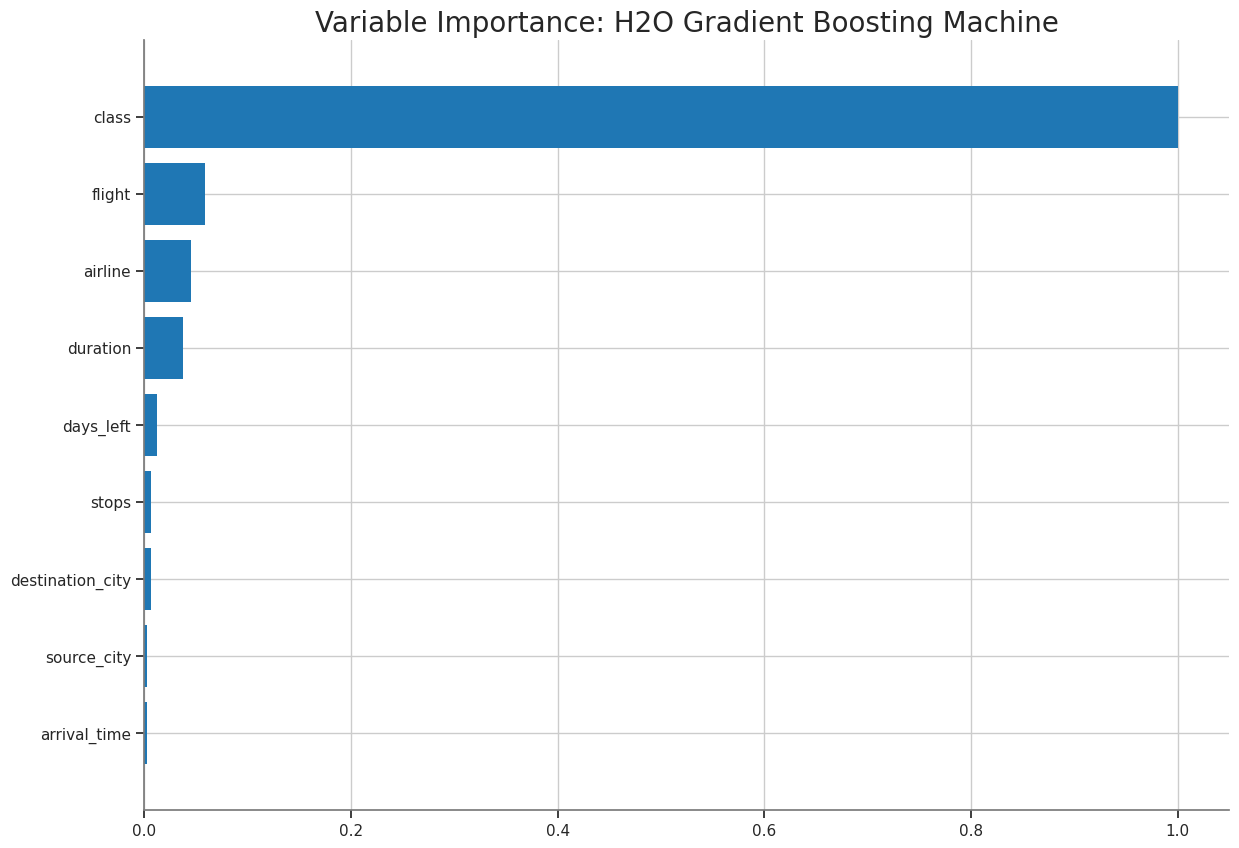

<Figure size 640x480 with 0 Axes>

In [72]:
# plot the graph for variable importance by model
model.varimp_plot(num_of_features = 9)




Now, we can save this model using the model.save method, this model can be deployed on various platforms.

In [73]:
# Save the baseline model
model_path = h2o.save_model(model = model, path ='/content/drive/MyDrive/', force = True)



Variable Importance (Percentage):
class: 85.28%
flight: 5.03%
airline: 3.83%
duration: 3.20%
days_left: 1.06%
stops: 0.57%
destination_city: 0.56%
source_city: 0.20%
arrival_time: 0.20%
departure_time: 0.08%


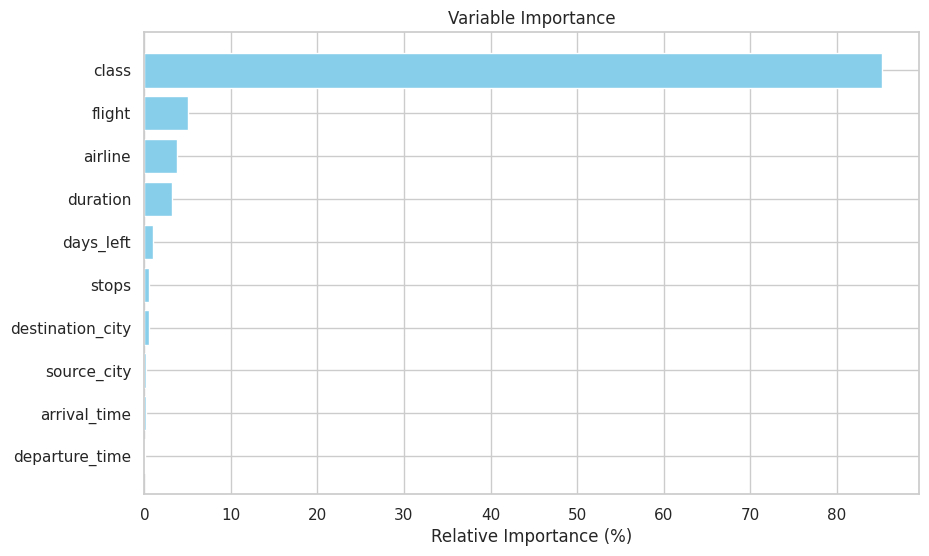

In [86]:
# Plot the graph for variable importance by coding

# Get variable importance
varimp = model.varimp()

# Sort variable importance values in descending order
varimp = sorted(varimp, key=lambda x: x[1], reverse=True)

# Calculate total importance for percentage calculation
total_importance = sum(item[1] for item in varimp)

# Convert importance values to percentages
percentage_importance = [(item[0], (item[1] / total_importance) * 100) for item in varimp]

# Display variable importance as percentages
print("\nVariable Importance (Percentage):")
for variable, percentage in percentage_importance:
    print(f"{variable}: {percentage:.2f}%")

# Plot variable importance
import matplotlib.pyplot as plt

h2o.cluster().shutdown()  # Shutdown H2O cluster before plotting

# Extract variable names and importance values
variables = [item[0] for item in varimp]
importance_values = [item[1] for item in percentage_importance]

# Plot variable importance
plt.figure(figsize=(10, 6))
plt.barh(variables[::-1], importance_values[::-1], color='skyblue')  # Reverse the order
plt.xlabel('Relative Importance (%)')
plt.title('Variable Importance')
plt.show()





Base on this model, we can see that the variables with higher importance values contribute more to the model's predictive performance. In this case, for flight price prediction, 'class' variables which are Business and Economy have a stronger influence on determining the flight prices.

The bar plot above identify which variables have the most significant impact on the model. If certain variables have much higher importance values than others, they are more critical for making accurate predictions.

## Conclusion

In conclusion, this assignment give us the opportunity to try the whole step of the future engineering process in order to determine the importance of variables in contributing to the model's prediction.

By using H2O AutoML, it automates the steps like basic data processing, model training and tuning, and ensemble and stacking of various models to provide the models with the best performance. By these automated features, we can focus on other steps like data collection, feature engineering and deployment of model.

However, it's essential to note that understanding the data and the problem domain remains crucial. The domain knowledge should still play a role in guiding the overall data preprocessing and feature selection strategy.